# Исследование объявлений о продаже квартир

В вашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
Цель исследования: определить рыночную стоимость объектов недвижимости. 
Задача исследования: определить, от каких факторов зависит цена объекта недвижимости.  

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

План проекта
1.	Исследование данных 
2. Предобработка данных
3. Расчет новых показателей
4. Исследовательский анализ данных
5. Вывод

### 1. Исследование данных

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\\t')
data.info() # информация о таблице
data.describe()# вывод описательной статистики по переменным

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Выведена информация о данных. Выведена описательная статистика по переменным для поиска пропусков данных и аномалий. В данных есть пропуски, об этом свидетельствует количество значений в переменных ceiling_height, floors_total, living_area, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, ponds_nearest и days_exposition.

### 2. Предобработка данных

In [3]:
data = data.dropna(subset = ['floors_total'])# удаление строк с пропусками в переменной floors_total
data.info()# проверка удаления

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          14495 non-null float64
floors_total            23613 non-null float64
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            2775 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21382 non-null float64
balcony                 12133 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around300

В переменной floors_total есть пропущенные значения (86 шт.). Учитывая, что высотность дома не возможно определить косвенными методами, а также малое число пропусков, соответствующие строки будут удалены. Проверяем удаление. Скорее всего, пропуски возникли из-за того, что авторы объявлений забыли указать этот параметр.

In [4]:
print(data['is_apartment'].unique())# просмотр уникальных значений переменной is_apartment
data['is_apartment'] = data['is_apartment'].fillna(value = False)# заполнение пропусков значениями False
print(data['is_apartment'].unique()) # проверка правильности заполнения

[nan False True]
[False  True]


В переменной is_apartment очень мало заполненных значений. При рассмотрении уникальных значений переменной выявлено 3 варианта значений: True, False и Nan (пропуск). Скорее всего, пропущенные значения означают, что рассматриваемые объекты не являются аппартаментами. Заполняем пропуски значениями False. Проверяем заполнение.

In [5]:
print(data['balcony'].unique())# просмотр уникальных значений переменной balcony
data['balcony'] = data['balcony'].fillna(value = 0)# заполнение пропусков нолями
print(data['balcony'].unique())# проверка правильности заполнения

[nan  2.  0.  1.  5.  4.  3.]
[0. 2. 1. 5. 4. 3.]


В переменной balcony есть пропущенные значения. Если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Заменяем пропуски на 0. Проверяем заполнение. 

In [6]:
data['ceiling_height'] = data.groupby('rooms')['ceiling_height'].apply(lambda x: x.fillna(x.median()))
check_ch = data['ceiling_height'].isnull().sum()
print(check_ch)# проверка на наличие пропусков
print(data.groupby('rooms')['ceiling_height'].median())# поиск незаполненного значения в переменной ceiling_height

1
rooms
0     2.750
1     2.640
2     2.600
3     2.650
4     2.800
5     3.100
6     3.200
7     3.380
8     3.420
9     3.200
10    3.150
11    3.415
12    2.800
14    3.160
15    3.500
16    3.000
19      NaN
Name: ceiling_height, dtype: float64


/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


В СССР, а впоследствии в РФ строились типовые дома с типовыми квартирами. Исходя из этого, предположим, что высота потолков в квартирах с одинаковым количеством комнат также будет одинакова.
Выявленные ранее пропущенные значения в переменной ceiling_height заполняем медианными значениями соответствующих показателей в зависимости от количества комнат (rooms). Проверяем переменные на наличие пропусков.
Единственное незаполненное значение относится к 19-комнатной квартире. Учитывая, что она единственная в совокупности, заполнять ее не будем, т.к. в данном случае высота потолка вряд ли существенно повлияет на цену квартиры.

In [7]:
data['living_area'] = data.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))
check_la = data['living_area'].isnull().sum()
print(check_la)# проверка на наличие пропусков

0


Учитывая, что дома строятся по типовым проектам, жилая площадь в квартирах с определенным количеством комнат также будет одинаковой. Выявленные ранее пропущенные значения в переменной living_area заполняем медианными значениями соответствующих показателей в зависимости от количества комнат (rooms). Проверяем переменные на наличие пропусков. Возможная причина появления пропусков: авторы объявлений затруднились определить жилую площадь по тем или иным причинам (например, из-за перепланировок квартир).

In [8]:
data['kitchen_area'] = data.groupby('rooms')['kitchen_area'].apply(lambda x: x.fillna(x.median()))
check_la = data['kitchen_area'].isnull().sum()
print(check_la)# проверка на наличие пропусков
data['kitchen_area'] = data['kitchen_area'].fillna(0)
check_la = data['kitchen_area'].isnull().sum()
print(check_la)# проверка на наличие пропусков

194
0


Учитывая, что дома строятся по типовым проектам, площадь кухни в квартирах с определенным количеством комнат также будет одинаковой. Выявленные ранее пропущенные значения в переменной kitchen_area заполняем медианными значениями соответствующих показателей в зависимости от количества комнат (rooms). Проверяем переменную на наличие пропусков.
Осталось 194 пропуска. Предположительно, это квартиры студии и комнаты в коммунальных квартирах, т.е. квартиры, у которых нет кухни. Присваиваем пропущенным данным значение 0. Проверяем переменную на наличие пропусков. 

In [9]:
ln_cc = data.groupby('locality_name')['cityCenters_nearest'].median()# расчет медиан удаленности от центра по населенным пунктам
ln_cc = ln_cc.dropna() # очистка полученных данных от нулей
print(ln_cc.sort_values(ascending = False).tail())
def loc_nam(city_c):
    ccn = city_c['cityCenters_nearest']
    if ccn <= ln_cc['Санкт-Петербург']: # сравнение расстояний от центра населенного пункта с медианным растоянием от центра Санкт-Петербурга
        return 'Санкт-Петербург'
    else:
        return 'Другие'
p = data.apply(loc_nam, axis=1)
data['locality_name'] = data['locality_name'].fillna(p)# заполнение пропусков 
data.info() # проверка на пропущенные значения
print(data.loc[data.loc[:, 'locality_name'] == 'Другие']['locality_name'].count())# проверка сколько населенных пунктов отнесены к значению "Другие"

locality_name
посёлок Левашово     25727.0
посёлок Шушары       24212.0
посёлок Стрельна     23506.0
посёлок Парголово    19311.0
Санкт-Петербург      12242.0
Name: cityCenters_nearest, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23612 non-null float64
floors_total            23613 non-null float64
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23613 non-null float64
balcony                 23613 non-null float64
locality_name           23613 non-null object
ai

Для заполнения данных по столбцу locality_name рассчитаем медианное расстояние от центра по каждому населенному пункту. Пропущенным значениям по столбцу locality_name присваиваем значение "Санкт-Петербург" (минимальное медианное значение расстояний от центра), если соответствующее значение переменной cityCenters_nearest меньше медианного значения для г. Санкт-Петербург, в противном случае присваиваем значение "Другие". Проверяем заполнение столбца. Проверяем, сколько значений переменной заполнились признаком "Другие". Их 22. Т.к. большинство пропущенных значений были отнесены к Санкт-Петербургу, то причиной пропусков явлвлось мнение авторов объявлений, что если они продают квартиру в г. Санкт-Петербурге, то название населенного пункта указывать не надо.

In [10]:
check_an = data['airports_nearest'].isnull().sum()
print(check_an)# проверка на наличие пропусков
data['airports_nearest'] = data.groupby('locality_name')['airports_nearest'].apply(lambda x: x.fillna(x.median()))
check_an = data['airports_nearest'].isnull().sum()
print(check_an)# проверка на наличие пропусков

5532
5432


Для заполнения данных по столбцу airports_nearest рассчитаем медианное расстояние до аэропорта по каждому населенному пункту.Выявленные ранее пропущенные значения в переменной airports_nearest заполняем медианными значениями соответствующих показателей в зависимости от населенного пункта, в котором находится квартира. Таким образом удалось заполнить 100 пропусков. Остальные значения обоснованно заполнить невозможно. Будем считать, что данные квартиры находятся от аэропорта очень далеко. 

In [35]:
check_ccn = data['cityCenters_nearest'].isnull().sum()
print(check_ccn)# проверка на наличие пропусков
data['cityCenters_nearest'] = data.groupby('locality_name')['cityCenters_nearest'].apply(lambda x: x.fillna(x.median()))
check_an = data['cityCenters_nearest'].isnull().sum()
print(check_an)# проверка на наличие пропусков

5509
5432


Для заполнения данных по столбцу cityCenters_nearest рассчитаем медианное расстояние до аэропорта по каждому населенному пункту.Выявленные ранее пропущенные значения в переменной cityCenters_nearest заполняем медианными значениями соответствующих показателей в зависимости от населенного пункта, в котором находится квартира. Таким образом удалось заполнить 77 пропусков. Остальные значения обоснованно заполнить невозможно. Будем считать, что данные квартиры находятся в удаленных населенных пунктах, которые не являются городами. 

In [11]:
print(data.duplicated().sum())# проверка на дубли

0


Проверяем данные на дублированные строки. Дублей нет.

In [12]:
def change(parks):
    ind = parks['parks_nearest']
    if ind <= 3000:
        return 1
    else:
        return 0
f = data.apply(change, axis=1)
data['parks_around3000'] = data['parks_around3000'].fillna(f)
check_pa = data['parks_around3000'].isnull().sum()
print(check_pa)# проверка на наличие пропусков
print(data['parks_around3000'].value_counts())

0
0.0    15572
1.0     5657
2.0     1739
3.0      645
Name: parks_around3000, dtype: int64


Заполняем пропуски в переменной parks_around3000: если до ближайшего парка меньше 3 км, значит, по крайней мере, один парк в округе есть: ставим 1, иначе 0. Проверяем заполнение.

In [13]:
def ponds(water):
    ind = water['ponds_nearest']
    if ind <= 3000:
        return 1
    else:
        return 0
z = data.apply(ponds, axis=1)
data['ponds_around3000'] = data['ponds_around3000'].fillna(z)
check_pa = data['ponds_around3000'].isnull().sum()
print(check_pa)# проверка на наличие пропусков
print(data['ponds_around3000'].value_counts())

0
0.0    14552
1.0     5677
2.0     1886
3.0     1498
Name: ponds_around3000, dtype: int64


Заполняем пропуски в переменной ponds_around3000: если до ближайшего водоема меньше 3 км, значит, по крайней мере, один пруд в округе есть: ставим 1, иначе 0. Проверяем заполнение.

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')# приведение строки в формат даты
data['floors_total'] = data['floors_total'].astype('int')# перевод переменной floors_total из дробной в целочисленные
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data.loc[data['days_exposition'].notnull(), 'days_exposition'] = data.loc[data['days_exposition'].notnull(), 'days_exposition'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null datetime64[ns]
rooms                   23613 non-null int64
ceiling_height          23612 non-null float64
floors_total            23613 non-null int64
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23613 non-null float64
balcony                 23613 non-null int64
locality_name           23613 non-null object
airports_nearest        18181 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        23613 non-null int64
parks_nearest           8045 non-null float64
ponds_around30

Переменные floors_total (количество этажей в доме), balcony (количество балконов в квартире), parks_around3000 (количество парков), ponds_around3000 (количество водоемов) не могут быть дробными. Переменнаую days_exposition (количество дней размещения объявления) в целях данного исследования удобнее использовать, как целочисленную, а не как дробную. Переводим перечисленные переменные в целочисленный формат. Т.к. в переменной days_exposition есть значения Nan, в целочисленные переводим только те значения, которые выражены цифрами.

### 3. Расчет новых показателей

In [15]:
data['price_m'] = data['last_price'] / data['total_area']
print(data['price_m'].head())

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: price_m, dtype: float64


Расчет стоимости квадратного метра: цену делим на общую площадь. Проверяем заполнение.

In [16]:
data['month_fdes'] = data.first_day_exposition.dt.month
print(data[['first_day_exposition', 'month_fdes']].head())

  first_day_exposition  month_fdes
0           2019-03-07           3
1           2018-12-04          12
2           2015-08-20           8
3           2015-07-24           7
4           2018-06-19           6


In [17]:
data['year_fde'] = data.first_day_exposition.dt.year
print(data[['first_day_exposition', 'year_fde']].head())

  first_day_exposition  year_fde
0           2019-03-07      2019
1           2018-12-04      2018
2           2015-08-20      2015
3           2015-07-24      2015
4           2018-06-19      2018


Рассчитываем столбцы с месяцем и годом публикации объявления. Проверяем заполнение.

In [19]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64

Определяем дни недели. Создаем переменную. Проверяем заполнение.

In [20]:
data['living_share'] = data['living_area'] / data['total_area']
data['living_share'].head()

0    0.472222
1    0.460396
2    0.612500
3    0.283019
4    0.320000
Name: living_share, dtype: float64

Рассчитываем долю жилой площади: делим жилую площадь на общую площадь. Создаем переменную. Проверяем заполнение.

In [21]:
data['kitchen_share'] = data['kitchen_area'] / data['total_area']
data['kitchen_share'].head()

0    0.231481
1    0.272277
2    0.148214
3    0.059748
4    0.410000
Name: kitchen_share, dtype: float64

Рассчитываем отношение площади кухни к общей площади. Создаем переменную. Проверяем заполнение.

In [22]:
def floor_cat(data_fl):
    if data_fl['floor'] == 1:
        return 'первый'
    elif data_fl['floor'] == data_fl['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_cat, axis = 1)
data[['floor','floors_total','floor_type']].head()

,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой


Создаем переменную типа этажа. С помощью функции задаем условия для отнесения этажей к определенному типу. Проверяем заполнение.

### 4. Исследовательский анализ данных

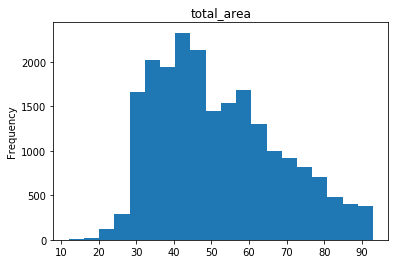

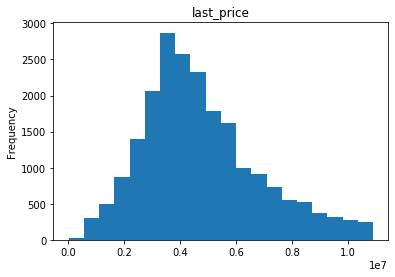

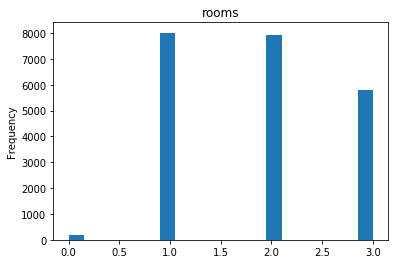

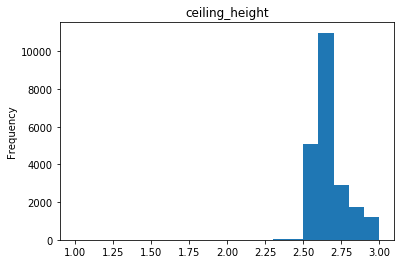

,total_area,last_price,rooms,ceiling_height
count,23613.000000,2.361300e+04,23613.000000,23612.000000
mean,60.340678,6.540555e+06,2.071147,2.722767
std,35.648988,1.090172e+07,1.078380,0.991495
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.640000
75%,69.800000,6.799000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


In [58]:
import matplotlib.pyplot as plt
main_ind = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for name in data[main_ind]:
    num = data[name].quantile(0.9).astype(int)
    pl = data[data[name]<=num][name]
    pl.plot(y=name, kind = 'hist', title = name, bins=20)
    plt.show()
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

Строим гистограммы для переменных площадь, цена, число комнат, высота потолков. Чтобы гистограммы стали наглядными, строим их не по всей совокупности значений, а по 90% значений указанных переменных. Для показателей total_area и ceiling_height прослеживается логнорамльное распределение, для last_price - распределение Пуассона, для показателя rooms идентифицировать распределение сложно. 

[array([nan, nan]), array([nan, nan])]


/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

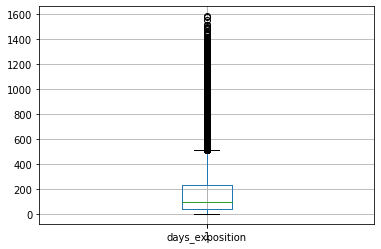

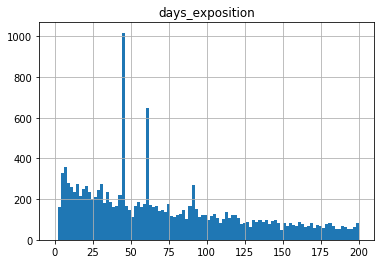

In [59]:
import matplotlib.pyplot as plt
data.boxplot('days_exposition')
box_area = plt.boxplot(data['days_exposition'])# строим диаграмму размаха
print([item.get_ydata() for item in box_area['whiskers']]) # определяем концы усов в диаграмме размаха
data.hist('days_exposition', range=(0, 200),bins = 100)
data['days_exposition'].describe()

Данные гистограммы и параметров переменной days_exposition свидетельствуют о перекосе данных в сторону быстрых продаж квартир.Исходя из гистограммы, обычно продажа квартиры в регионе занимает менее 95 дней (медиана). Очень быстрыми можно считать продажи, осуществленные в течение 39 дней со дня размещения объявления(нижняя граница коробки диаграммы размаха). Очень долгими - продажи, осуществленные свыше, чем через 204 дня со дня размещения объявления(верхняя граница коробки диаграммы размаха). Обращают на себя внимание 2 пика снятия объявлений, (1 на уровне, приблизительно, 42-43 дня; второй на уровне, приблизительно, 60 дней). Первый пик, скорее всего, обусловлен срочными продажами квартир, второй - оплатой продавцами 2-х месяцев размещения объявления, после чего, они не хотят или забывают оплатить размещение объявления на дальнейший срок и оно снимается с портала. 

[array([40., 12.]), array([ 69.8, 114.5])]


count    22375.000000
mean        54.348827
std         19.353442
min         12.000000
25%         39.400000
50%         50.100000
75%         65.600000
max        114.500000
Name: total_area, dtype: float64

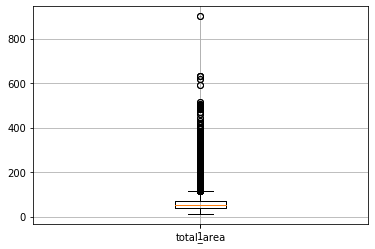

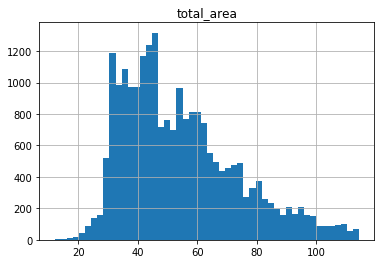

In [60]:
import matplotlib.pyplot as plt
data.boxplot('total_area')
box_area = plt.boxplot(data['total_area'])# строим диаграмму размаха
print([item.get_ydata() for item in box_area['whiskers']]) # определяем концы усов в диаграмме размаха
data = data[data.total_area <= 114.5] # отбрасываем аномальные значения
data.hist('total_area', bins = 50)# построение гистограммы
data['total_area'].describe()

Обработка переменной total_area. Для определения аномально больших значений переменной определяем конец правого уса в диаграмме размаха (114,5 м2). Отсекаем аномально большие размеры квартир (свыше 114,5 м2). Отброшено 1238 квартир. Строим гистограмму, рассчитываем характеристики переменной. Гистограмма соотвествует логнормальному распределению. Существенно уменьшился разброс (на 16,2 м2 или 45,5%).

[array([1., 0.]), array([3., 6.])]


count    22375.000000
mean         1.957810
std          0.885563
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

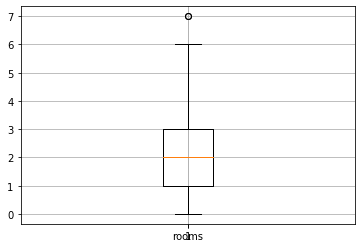

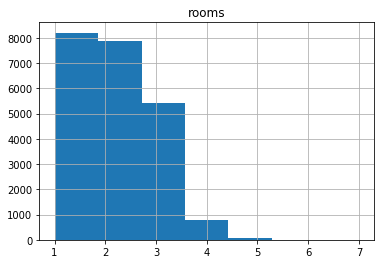

In [61]:
import matplotlib.pyplot as plt
data.boxplot('rooms')
box_area = plt.boxplot(data['rooms'])# строим диаграмму размаха
print([item.get_ydata() for item in box_area['whiskers']]) # определяем концы усов в диаграмме размаха 
data.loc[data['rooms'] == 0, 'rooms'] = 1 # замена 0 на 1
data.hist('rooms', bins = 7)# построение гистограммы
data['rooms'].describe()

Обработка переменной rooms. С учетом отброшенных аномальных значений переменной total_area, отбрасывать значения в переменной rooms нет необходимости. Мы получили распределение Пуассона. Единственно, у нас остались квартиры с 0 комнат. Возможно, так были идентифицированы квартиры-студии. Будем рассматривать их как однокомнатные. Присвоим таким квартирам статус однокомнатных.

count    22341.000000
mean         2.674592
std          0.193893
min          2.000000
25%          2.600000
50%          2.640000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

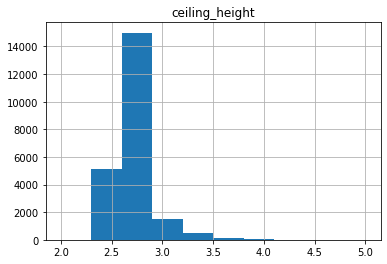

In [62]:
data = data[data.ceiling_height >= 2]# отбрасываем значения меньше 2 м
data = data[data.ceiling_height <= 5] # отбрасываем значения больше 5 м
data.hist('ceiling_height', bins = 10)# построение гистограммы
data['ceiling_height'].describe()

Обработка переменной ceiling_height. Из интернета узнаем, что высота потолков в СССР, затем в РФ лежит в диапазоне от 2 м (бараки, хрущевки) до свыше 4 м (некоторые сталинские дома). Соответственно отбрасываем квартиры, невходящие в этот диапазон. Относительно квартир с высотой потолков меньше 2 м, можно было бы подумать, что это ошибки, но это также могут быть переоборудованные технические помещения, которые выдают за квартиры. Суммарно были отброшены 34 квартиры.
Опять получаем распределение Пуассона.

[array([3360000.,   12190.]), array([ 6300000., 10700000.])]


count    2.101400e+04
mean     4.698939e+06
std      2.037597e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.350000e+06
75%      5.850000e+06
max      1.070000e+07
Name: last_price, dtype: float64

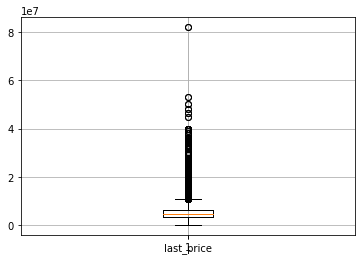

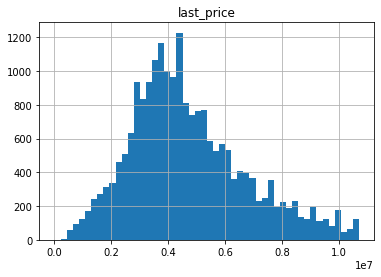

In [63]:
import matplotlib.pyplot as plt
data.boxplot('last_price')
box_area = plt.boxplot(data['last_price'])# строим диаграмму размаха
print([item.get_ydata() for item in box_area['whiskers']]) # определяем концы усов в диаграмме размаха 
data = data[data.last_price <= 10700000] # отбрасываем значения больше 40 млн. руб.
data.hist('last_price', bins = 50)# построение гистограммы
data['last_price'].describe()

Обработка переменной last_price. Для определения аномально больших значений переменной определяем конец правого уса в диаграмме размаха (10,7 млн. руб.). Отсекаем аномально большие цены (свыше 10,7 млн.). Отброшено 1327 квартир. Строим гистограмму, рассчитываем характеристики переменной. Гистограмма соотвествует распределению Пуассона. Разброс уменьшился на порядок.

count    16767.000000
mean       117.151786
std        108.424484
min          2.000000
25%         38.000000
50%         76.000000
75%        168.000000
max        451.000000
Name: days_exposition, dtype: float64

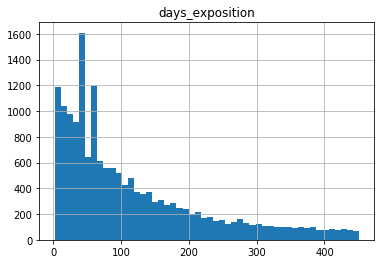

In [64]:
data = data[data.days_exposition <= 451] # отбрасываем аномальные значения
data = data[data.days_exposition > 1]
data.hist('days_exposition', bins = 50)# построение гистограммы
data['days_exposition'].describe()

Обработка переменной days_exposition. Для определения аномальных значений переменной из ранее построенной диаграммы размаха возьмем концы усов (левый ус - 1 день, правый ус - 451 дней). Отсекаем аномальные сроки размещения объявлений.  Строим гистограмму, рассчитываем характеристики переменной. Гистограмма в целом соотвествует распределению Пуассона, но есть выбросы. Разброс уменьшился вдвое.

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16767 entries, 1 to 23695
Data columns (total 29 columns):
total_images            16767 non-null int64
last_price              16767 non-null float64
total_area              16767 non-null float64
first_day_exposition    16767 non-null datetime64[ns]
rooms                   16767 non-null int64
ceiling_height          16767 non-null float64
floors_total            16767 non-null int64
living_area             16767 non-null float64
floor                   16767 non-null int64
is_apartment            16767 non-null bool
studio                  16767 non-null bool
open_plan               16767 non-null bool
kitchen_area            16767 non-null float64
balcony                 16767 non-null int64
locality_name           16767 non-null object
airports_nearest        12630 non-null float64
cityCenters_nearest     12600 non-null float64
parks_around3000        16767 non-null int64
parks_nearest           5105 non-null float64
ponds_around30

В результате проведенной чистки данных мы отбросили 6932 строки или 29,3% значений. Преемленый результат корректировки, основная часть значений пригодна для анализа.

-0.2524393885588339


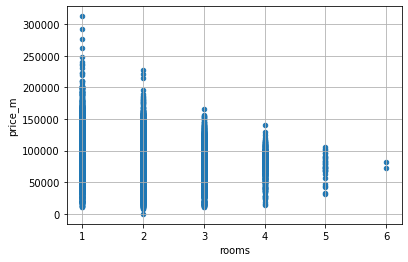

In [71]:
data.plot(x='rooms', y='price_m', kind='scatter', grid=True)
print(data['rooms'].corr(data['price_m']))

Рассчитаем коэффициент корреляции между переменными "цена м2" и "количество комнат в квартире", а также построим график.  
Связь между ценой м2 и количеством комнат очень слабая и обратная, т.е. чем больше комнат, тем ниже цена.
С другой стороны, график показывает, что чем больше в квартире комнат, тем меньше разброс цен.

-0.39367961972524995


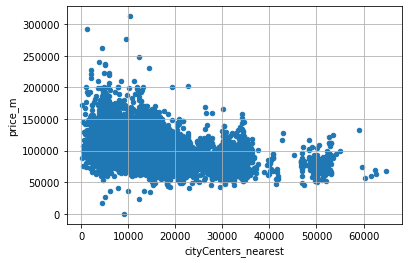

In [72]:
data.plot(x='cityCenters_nearest', y='price_m', kind='scatter', grid=True)
print(data['cityCenters_nearest'].corr(data['price_m']))

Рассчитаем коэффициент корреляции между переменными "цена м2" и "удаленность от центра", а также построим график. 
Тут вывод очевиден: связь между ценой м2 и удаленностью от центра средняя (ближе к слабой) и обратная, т.е. чем дальше от центра, тем ниже цена.

In [202]:
ft_price = data.pivot_table(index='floor_type', values='price_m', aggfunc='mean')
print(ft_price)

                 price_m
floor_type              
другой      95323.117365
первый      78312.886681
последний   82414.008414


Определим зависимость цены м2 от типа этажа. Построим сводную таблицу с разбивкой квартир по цене м2 в зависимости от типа этажа. Вывод: самая низкая средняя цена у квартир на 1-м этаже, чуть выше у квартир на последнем этаже. Квартиры на остальных этажах существенно дороже, чем квартиры на первом и последнем этажах. 

In [76]:
data[['price_m','total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest', 'floor', 'floors_total', 'balcony','days_exposition']].corr()

,price_m,total_area,rooms,ceiling_height,cityCenters_nearest,floor,floors_total,balcony,days_exposition
price_m,1.000000,-0.122802,-0.252439,0.182602,-0.393680,0.250367,0.341661,0.045080,-0.050376
total_area,-0.122802,1.000000,0.804308,0.238427,-0.105922,-0.036371,-0.028579,0.060709,0.088461
rooms,-0.252439,0.804308,1.000000,0.087272,-0.067971,-0.182508,-0.234295,0.002568,0.069174
ceiling_height,0.182602,0.238427,0.087272,1.000000,-0.222268,-0.008737,-0.009602,-0.024301,0.045025
cityCenters_nearest,-0.393680,-0.105922,-0.067971,-0.222268,1.000000,-0.014369,-0.033276,0.046650,0.010977
floor,0.250367,-0.036371,-0.182508,-0.008737,-0.014369,1.000000,0.676960,0.157039,-0.040448
floors_total,0.341661,-0.028579,-0.234295,-0.009602,-0.033276,0.676960,1.000000,0.166078,-0.046340
balcony,0.045080,0.060709,0.002568,-0.024301,0.046650,0.157039,0.166078,1.000000,-0.021321
days_exposition,-0.050376,0.088461,0.069174,0.045025,0.010977,-0.040448,-0.046340,-0.021321,1.000000


Построим матрицу корреляции по ряду параметров. Как показала матрица цена квадратного метра достаточно слабо зависит от указанных показателей. Наиболее сильная зависимость наблюдается у цены м2 от удаленности дома от центра (-0,394) и этажности дома (0,342). На самом деле, указанные коэффициенты корреляции указывают на достаточно слабую зависимость. 

-0.012276465974741298


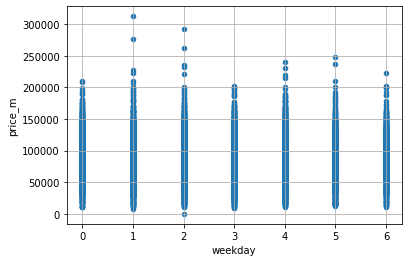

In [203]:
data.plot(x='weekday', y='price_m', kind='scatter', grid=True)
print(data['weekday'].corr(data['price_m']))

Определим зависимость цены м2 от дня недели размещения объявления. Коэффициент корреляции показывает отсутствие связи.  Отдельные точки, соответствующие вторнику, среде, пятнице и субботе, - это выбросы, которые случаются очень редко.

-0.006331016009967069


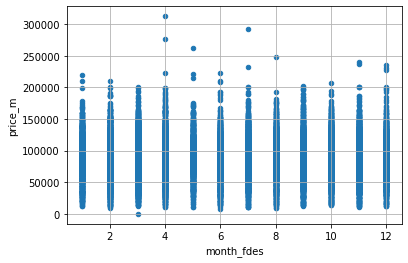

In [204]:
data.plot(x='month_fdes', y='price_m', kind='scatter', grid=True)
print(data['month_fdes'].corr(data['price_m']))

Определим зависимость цены м2 от месяца размещения объявления. Коэффициент корреляции показывает отсутствие связи. Как и в случае с днями недели, имеем на графике равномерное распределение средней цены по дням недели с редкими выбросами.

0.08565757330897515


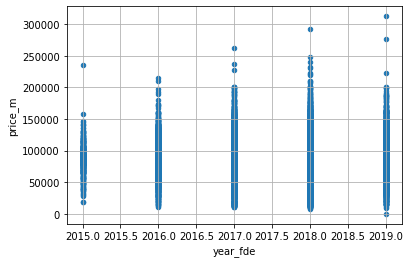

In [206]:
data.plot(x='year_fde', y='price_m', kind='scatter', grid=True)
print(data['year_fde'].corr(data['price_m']))

Определим зависимость цены м2 от года размещения объявления. Коэффициент корреляции показывает отсутствие связи. Однако, как видно из графика в период с 2015 по 2018 гг. цены на квартиры росли, в 2019 г. - наблюдалось падение цен, вызванное экономическим кризисом.

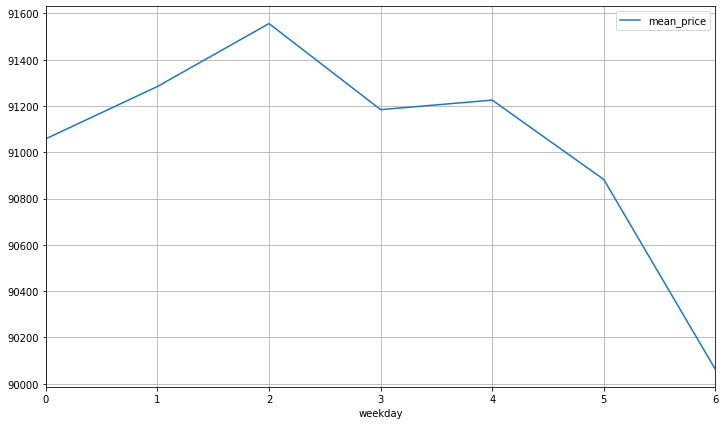

In [79]:
price_mean = data.pivot_table(index='weekday', values='price_m', aggfunc=['mean'])# расчет средней цены по дням недели
price_mean.columns = ['mean_price']
price_mean.plot(y='mean_price', kind='line', grid=True, figsize=[12,7])

Проанализируем среднюю цену м2 в зависимости от дня недели размещения объявления. Исходя из построенного графика видно, что наиболее высокая средняя цена м2 наблюдается в объявлениях, размещенных в среду, наиболее низкая - в объявлениях, размещенных в воскресенье. Зависимость цены м2 от дня недели есть, но она не существенная, учитывая диапазон колебания цены (1,5 т.р.).

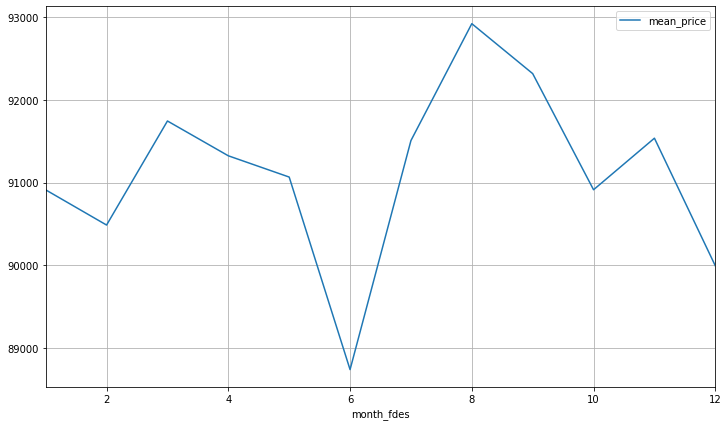

In [80]:
price_mean = data.pivot_table(index='month_fdes', values='price_m', aggfunc=['mean'])# расчет средней цены по месяцам
price_mean.columns = ['mean_price']
price_mean.plot(y='mean_price', kind='line', grid=True, figsize=[12,7])

Проанализируем среднюю цену м2 в зависимости от месяца размещения объявления. Исходя из построенного графика видно, что наиболее высокая средняя цена м2 наблюдается в объявлениях, размещенных в августе, наиболее низкая - в объявлениях, размещенных в июне. Видимо, низкая цена в июне обусловлена начинающимся периодом отпусков и желанием привлечь клиентов низкой ценой, а в августе продавцы поднимают цены в надежде на спрос, который возникнет по окончании периода отпусков в сентябре. Зависимость цены м2 от месяца есть.

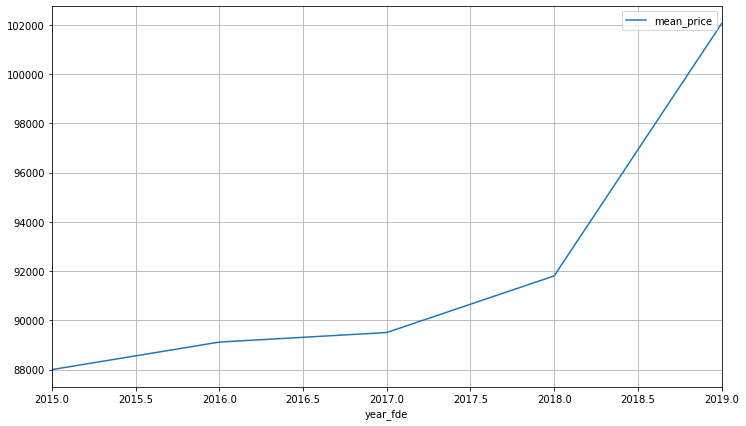

In [81]:
price_mean = data.pivot_table(index='year_fde', values='price_m', aggfunc=['mean'])# расчет средней цены по годам
price_mean.columns = ['mean_price']
price_mean.plot(y='mean_price', kind='line', grid=True, figsize=[12,7])

Проанализируем среднюю цену м2 в зависимости от года размещения объявления. Исходя из построенного графика видна тенденция роста средней цены м2. При этом скорость роста цены нарастает, что говорит о растущем спросе на жилую недвижимость.  Зависимость цены м2 от года есть.

<font color='green'>Отличный и очень наглядный анализ!

In [87]:
top_towns = data['locality_name'].value_counts().head(10)# выбор 10 населенных пунктов с наибольшим числом объявлений
print(top_towns)
data_top_towns = data.query('locality_name in @top_towns.index') # срез общей таблицы по указанным 10 населенным пунктам
data_top_towns.head()

Санкт-Петербург      10666
посёлок Мурино         473
посёлок Шушары         376
Всеволожск             298
Колпино                285
посёлок Парголово      281
деревня Кудрово        263
Пушкин                 254
Гатчина                237
Выборг                 184
Name: locality_name, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m,month_fdes,year_fde,weekday,living_share,kitchen_share,floor_type
1,7,3350000.0,40.40,2018-12-04,1,2.64,11,18.60,1,False,...,0,NaN,81.0,82920.792079,12,2018,1,0.460396,0.272277,первый
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121.0,100000.000000,6,2018,1,0.320000,0.410000,другой
6,6,3700000.0,37.30,2017-11-02,1,2.64,26,10.60,6,False,...,0,NaN,155.0,99195.710456,11,2017,3,0.284182,0.386059,другой
8,20,2900000.0,33.16,2018-05-23,1,2.64,27,15.43,26,False,...,0,NaN,189.0,87454.764777,5,2018,2,0.465320,0.265682,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,289.0,88524.590164,2,2017,6,0.714754,0.106557,другой


Выделяем 10 населенных пунктов с наибольшим количеством объявлений методом value_counts. Делаем срез общей таблицы по указанным 10 населенным пунктам. Проверяем результат.

In [84]:
tt_price = data_top_towns.pivot_table(index='locality_name', values='price_m', aggfunc=['mean'])# расчет средней цены по населенным пунктам
tt_price.columns = ['mean_price']
tt_price = tt_price.sort_values(by = 'mean_price')# сортировка
print(tt_price)

                      mean_price
locality_name                   
Выборг              57296.692593
Всеволожск          66712.075330
Гатчина             68340.187115
Колпино             74582.000392
посёлок Шушары      77814.248774
посёлок Мурино      85977.210979
посёлок Парголово   89265.788181
деревня Кудрово     92602.833271
Пушкин              99201.656424
Санкт-Петербург    103858.549114


Рассчитаем среднюю цену квадратного метра по 10 выделенным населенным пунктам с помощью сводной таблицы. Минимальная цена наблюдается в г. Выборг (58,3 т.р.), максимальная цена в г. Санкт-Петербург (105 т.р.).

<font color=green>Здесь все верно.

In [90]:
data_spb = data.query('locality_name == "Санкт-Петербург"')# выделяем квартиры в г. Санкт-Петербург
data_spb['cc_km'] = data_spb['cityCenters_nearest']/1000 # расчет расстояния до центра в км
data_spb.loc[data_spb['cc_km'].notnull(), 'cc_km'] = data_spb.loc[data_spb['cc_km'].notnull(), 'cc_km'].astype('int')# перевод переменной в целочисленную
data_spb.loc[:,('locality_name', 'cc_km')].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,locality_name,cc_km
4,Санкт-Петербург,8.0
9,Санкт-Петербург,15.0
10,Санкт-Петербург,13.0
15,Санкт-Петербург,14.0
16,Санкт-Петербург,10.0


Выделяем объявления по г. Санкт-Петербург. Переводим расстояния квартиры от центра в километры в переменной cc_km. Делаем ее целочисленной. Проверяем.

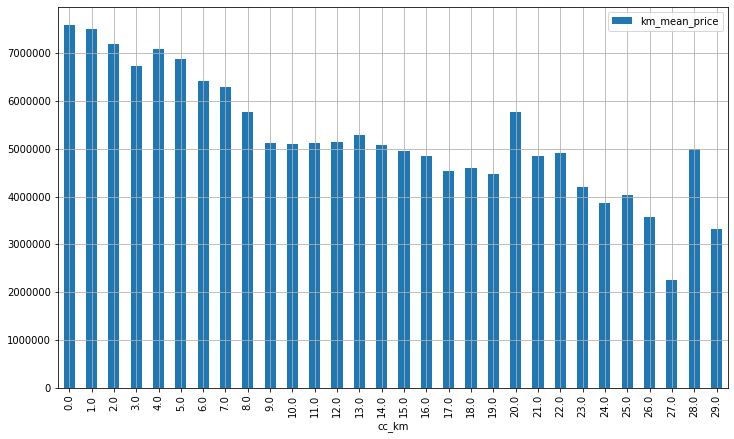

In [91]:
km_price = data_spb.pivot_table(index='cc_km', values='last_price', aggfunc=['mean'])# расчет средней цены по каждому км
km_price.columns = ['km_mean_price']
km_price.plot(y='km_mean_price', kind='bar', grid=True, figsize=[12,7])

Рассчитаем среднюю цену квартиры по каждому километру. Построим график цен. Из графика видно, что наибольшее изменение цены наблюдается между 8 и 9 километрами от центра. Т.е центральная зона города ограничена 8 км от центра.

In [92]:
data_centr_spb = data_spb.query('cc_km <= 8')# выделяем квартиры в центе г. Санкт-Петербург
data_centr_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_m,month_fdes,year_fde,weekday,living_share,kitchen_share,floor_type,cc_km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,100000.000000,6,2018,1,0.320000,0.410000,другой,8.0
24,8,6500000.0,97.2,2015-10-31,2,2.60,3,46.5,1,False,...,124.0,265.0,66872.427984,10,2015,5,0.478395,0.201646,первый,2.0
70,9,3400000.0,30.0,2018-09-05,1,2.64,5,16.0,1,False,...,NaN,14.0,113333.333333,9,2018,2,0.533333,0.233333,первый,8.0
94,3,3500000.0,29.5,2019-04-26,1,2.50,5,15.6,2,False,...,NaN,4.0,118644.067797,4,2019,4,0.528814,0.186441,другой,7.0
99,32,9600000.0,90.0,2017-09-26,4,2.80,5,67.0,2,False,...,NaN,104.0,106666.666667,9,2017,1,0.744444,0.088889,другой,2.0


Выделяем данные по центру г. Санкт-Петербург. Проверяем. 

In [93]:
print('Данные по квартирам центра Санкт-Петербурга')
data_centr_spb[['total_area', 'rooms', 'price_m', 'ceiling_height']].describe()


Данные по квартирам центра Санкт-Петербурга


,total_area,rooms,price_m,ceiling_height
count,2065.000000,2065.000000,2065.000000,2065.000000
mean,59.832785,2.143826,114719.483901,2.821772
std,19.897786,0.911353,27741.552315,0.296534
min,12.000000,1.000000,17391.304348,2.400000
25%,44.500000,1.000000,94794.344473,2.600000
50%,57.800000,2.000000,109714.285714,2.680000
75%,74.000000,3.000000,131175.468484,3.000000
max,114.200000,6.000000,292307.692308,4.370000


In [94]:
print('Данные по квартирам Санкт-Петербурга')
data_spb[['total_area', 'rooms', 'price_m', 'ceiling_height']].describe()

Данные по квартирам Санкт-Петербурга


,total_area,rooms,price_m,ceiling_height
count,10666.000000,10666.000000,10666.000000,10666.000000
mean,52.360652,1.906994,103858.549114,2.672259
std,17.286606,0.872443,22031.934369,0.185894
min,12.000000,1.000000,111.834862,2.000000
25%,39.100000,1.000000,88888.888889,2.600000
50%,48.500000,2.000000,100728.599867,2.640000
75%,62.700000,3.000000,115384.615385,2.700000
max,114.200000,6.000000,312240.000000,4.700000


Сравним показатели квартир центра Санкт-Петербурга с показателями квартир всего Санкт-Петербурга. По всем средним показателям центр превосходит город: в центре больше средняя площадь квартир, больше комнат в квартирах, выше цена за квадратный метр, потолки также выше. Квантильные показатели из описательных статистик также выше у центра. Только по количеству комнат центр и город равны.

Зависимость цены м2 от количества комнат в центре Санкт-Петербурга
-0.5053592241157587


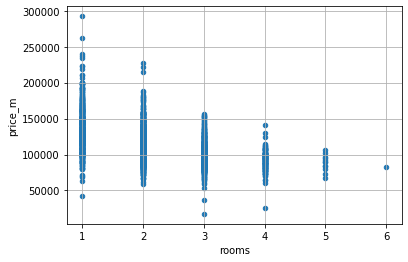

In [95]:
print('Зависимость цены м2 от количества комнат в центре Санкт-Петербурга')
data_centr_spb.plot(x='rooms', y='price_m', kind='scatter', grid=True)
print(data_centr_spb['rooms'].corr(data['price_m']))

Зависимость цены м2 от количества комнат в Санкт-Петербурге
-0.3947610399789981


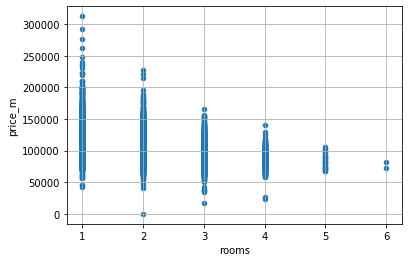

In [96]:
print('Зависимость цены м2 от количества комнат в Санкт-Петербурге')
data_spb.plot(x='rooms', y='price_m', kind='scatter', grid=True)
print(data_spb['rooms'].corr(data['price_m']))

Сравним зависимость цены м2 от количества комнат в центре города с аналогичным показателем по всему городу. Для центра города характерна средняя обратная связь между ценой м2 и количеством комнат. Т.е. чем меньше комнат, тем выше цена м2. Для всего города связь также обратная, но существенно слабее, что, скорее всего обусловлено более разнородным качеством отделки квартир в городе по сравнению с центром. Как правило, в центре городов в России живут более богатые люди, чем на окраинах. Они могут себе позволить более дорогой ремонт, чем жители окраин.

Зависимость цены м2 от типа этажа в центре Санкт-Петербурга


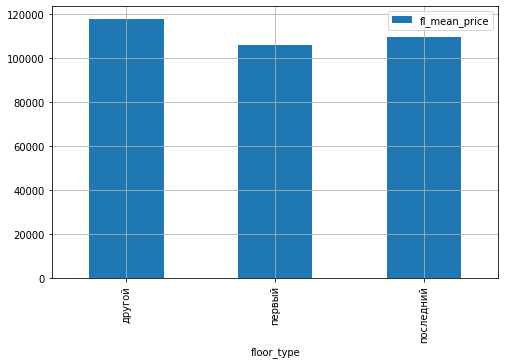

In [97]:
print('Зависимость цены м2 от типа этажа в центре Санкт-Петербурга')
ft_price = data_centr_spb.pivot_table(index='floor_type', values='price_m', aggfunc='mean')
ft_price.columns = ['fl_mean_price']
ft_price.plot(y='fl_mean_price', kind='bar', grid=True, figsize=[8,5])

Зависимость цены м2 от типа этажа в Санкт-Петербурге


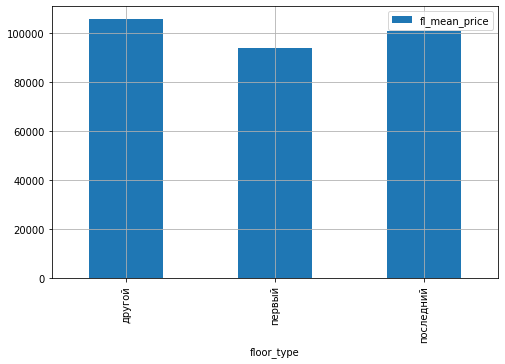

In [98]:
print('Зависимость цены м2 от типа этажа в Санкт-Петербурге')
ft_price = data_spb.pivot_table(index='floor_type', values='price_m', aggfunc='mean')
ft_price.columns = ['fl_mean_price']
ft_price.plot(y='fl_mean_price', kind='bar', grid=True, figsize=[8,5])

Сравним зависимость цены м2 от типа этажа т в центре города с аналогичным показателем по всему городу. Для центра, как и для всего города характерна минимальная цена м2 квартиры первого этажа, увеличенная (по сравнению с 1-м этажом) цена м2 квартиры последнего этажа и максимальная цена м2 квартиры этажей со 2-го по предпоследний. Однако в центре города цены м2 квартир, находящихся на 1-м и последнем этажах, почти равны, а в городе - между ними есть разница. Скорее всего, в центре более благополучная криминогенная ситуация, чем на окраинах, поэтому выбор между первым и посленим этажами в центре равнозначен. На окраинах покупатели получают скидку за риск быть ограбленным, покупая квартиру на 1-м этаже.

Зависимость цены м2 от удаленности от центра в центре Санкт-Петербурга
-0.042517585803182115


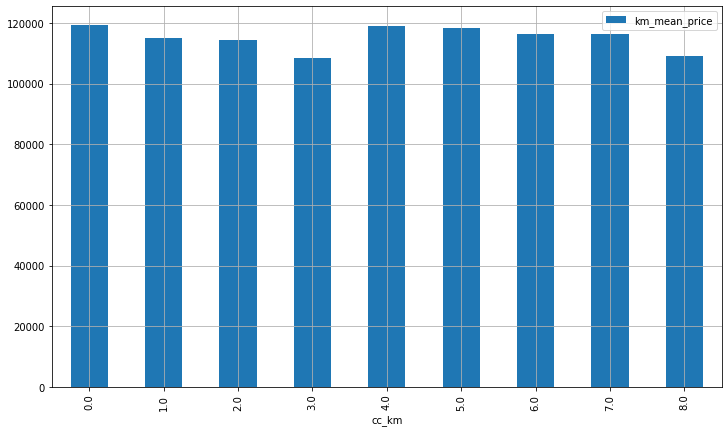

In [99]:
print('Зависимость цены м2 от удаленности от центра в центре Санкт-Петербурга')
print(data_centr_spb['cc_km'].corr(data['price_m']))
km_price = data_centr_spb.pivot_table(index='cc_km', values='price_m', aggfunc=['mean'])# расчет средней цены по каждому км
km_price.columns = ['km_mean_price']
km_price.plot(y='km_mean_price', kind='bar', grid=True, figsize=[12,7])

Зависимость цены м2 от удаленности от центра в Санкт-Петербурге
-0.2855968628537327


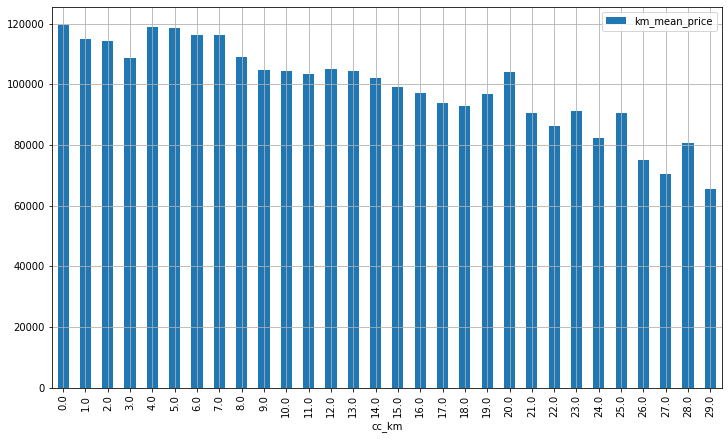

In [100]:
print('Зависимость цены м2 от удаленности от центра в Санкт-Петербурге')
print(data_spb['cc_km'].corr(data['price_m']))
km_price = data_spb.pivot_table(index='cc_km', values='price_m', aggfunc=['mean'])# расчет средней цены по каждому км
km_price.columns = ['km_mean_price']
km_price.plot(y='km_mean_price', kind='bar', grid=True, figsize=[12,7])

Сравним зависимость цены м2 от удаленности от центра в центре города с аналогичным показателем по всему городу. Для центра города характерно отсутствие связи между этими показателями, тогда как для всего города наблюдается слабая обратная связь, т.е. чем дальше от центра, тем ниже цена. Данная ситуация обусловлена тем, что для людей, живущих в центре, удаленность от центра не имеет такого значения, как для людей, живущих на окраинах, где каждый километр приближения к центру означает существенную прибавку к стоимости квартиры.

Зависимость цены м2 от дня недели размещения объявления в центре Санкт-Петербурга


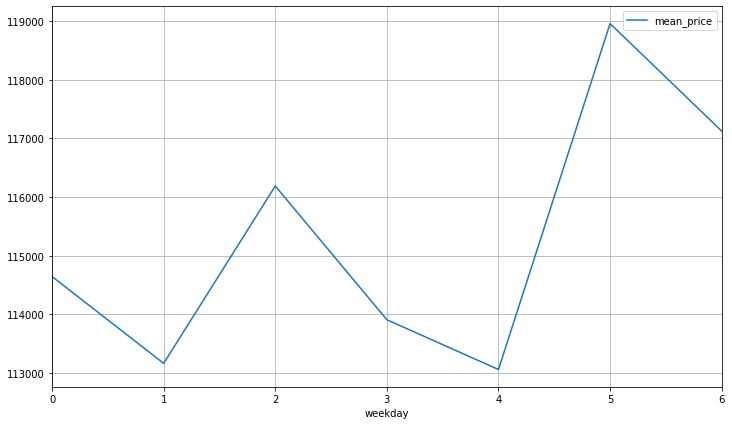

In [103]:
print('Зависимость цены м2 от дня недели размещения объявления в центре Санкт-Петербурга')
price_mean = data_centr_spb.pivot_table(index='weekday', values='price_m', aggfunc=['mean'])# расчет средней цены по дням недели
price_mean.columns = ['mean_price']
price_mean.plot(y='mean_price', kind='line', grid=True, figsize=[12,7])

Зависимость цены м2 от дня недели размещения объявления в Санкт-Петербурге


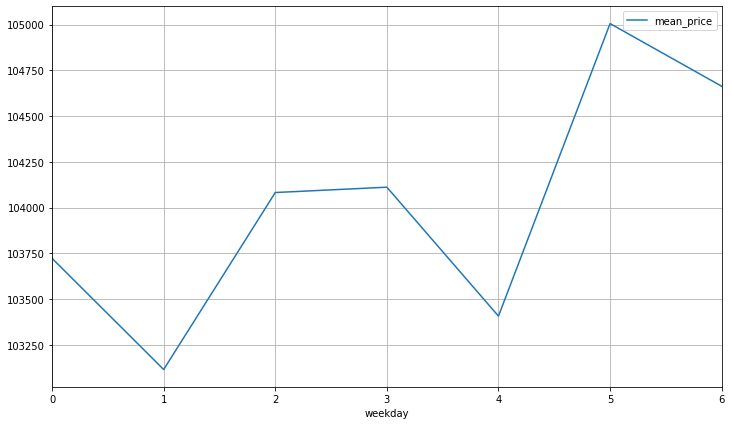

In [104]:
print('Зависимость цены м2 от дня недели размещения объявления в Санкт-Петербурге')
price_mean = data_spb.pivot_table(index='weekday', values='price_m', aggfunc=['mean'])# расчет средней цены по дням недели
price_mean.columns = ['mean_price']
price_mean.plot(y='mean_price', kind='line', grid=True, figsize=[12,7])

Сравним зависимость средней цены м2 от дня недели размещения объявления о продаже квартиры в центре города с аналогичным показателем по всему городу. Для центра города и для всего города характерно максимальное значение средней цены в объявлениях, размещенных в субботу. Минимальное значение средней цены м2 в центре наблюдается во вторник и пятницу, в городе - только во вторник.

Зависимость цены м2 от месяца размещения объявления в центре Санкт-Петербурга


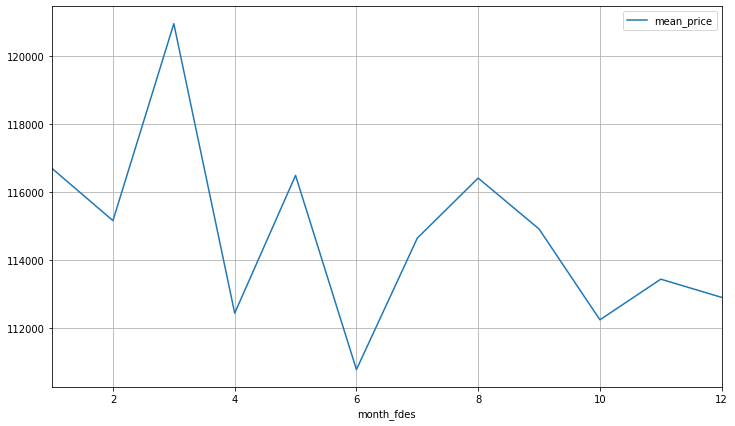

In [106]:
print('Зависимость цены м2 от месяца размещения объявления в центре Санкт-Петербурга')
price_mean = data_centr_spb.pivot_table(index='month_fdes', values='price_m', aggfunc=['mean'])# расчет средней цены по дням недели
price_mean.columns = ['mean_price']
price_mean.plot(y='mean_price', kind='line', grid=True, figsize=[12,7])

Зависимость цены м2 от месяца размещения объявления в Санкт-Петербурге


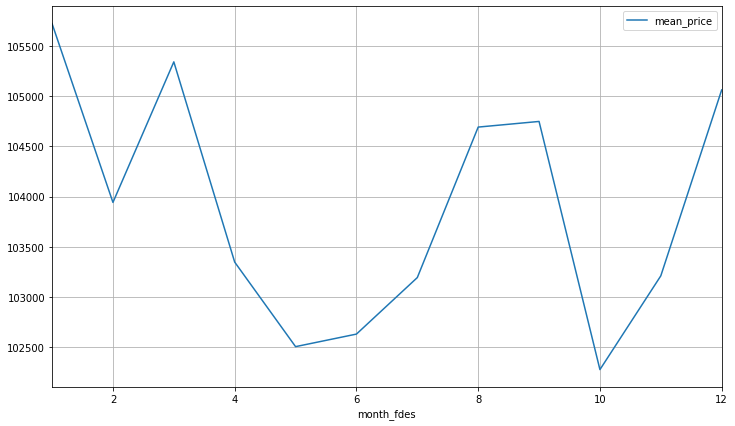

In [105]:
print('Зависимость цены м2 от месяца размещения объявления в Санкт-Петербурге')
price_mean = data_spb.pivot_table(index='month_fdes', values='price_m', aggfunc=['mean'])# расчет средней цены по дням недели
price_mean.columns = ['mean_price']
price_mean.plot(y='mean_price', kind='line', grid=True, figsize=[12,7])

Сравним зависимость средней цены м2 от месяца размещения объявления о продаже квартиры в центре города с аналогичным показателем по всему городу. Для центра города характерна тенденция снижения цены по ходу года. Максимальная средняя цена наблюдается в марте, минимальная - в июне. 
Для всего города характерно отсутствие выраженной тенденции. Максимальное значение средней цены наблюдается в январе, минимальное значение - в октябре.
Вместе с тем, следует отметить, что колебания цены м2 происходят в достаточно узких диапазонах (10 т.р. для центра города и 3-4 т.р. для всего города).

Зависимость цены м2 от года размещения объявления в центре Санкт-Петербурга


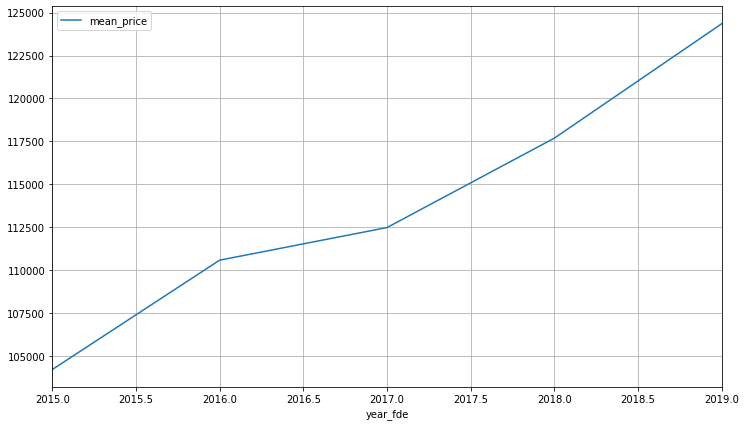

In [107]:
print('Зависимость цены м2 от года размещения объявления в центре Санкт-Петербурга')
price_mean = data_centr_spb.pivot_table(index='year_fde', values='price_m', aggfunc=['mean'])# расчет средней цены по дням недели
price_mean.columns = ['mean_price']
price_mean.plot(y='mean_price', kind='line', grid=True, figsize=[12,7])

Зависимость цены м2 от года размещения объявления в Санкт-Петербурге


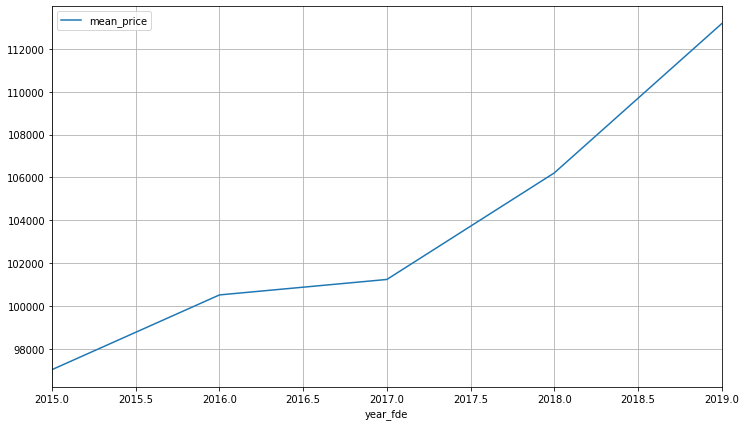

In [108]:
print('Зависимость цены м2 от года размещения объявления в Санкт-Петербурге')
price_mean = data_spb.pivot_table(index='year_fde', values='price_m', aggfunc=['mean'])# расчет средней цены по дням недели
price_mean.columns = ['mean_price']
price_mean.plot(y='mean_price', kind='line', grid=True, figsize=[12,7])

Сравним зависимость средней цены м2 от года размещения объявления о продаже квартиры в центре города с аналогичным показателем по всему городу. Для центра города и для всего города характерна устойчивая тенденция роста цены м2 от года к году, что свидетельствует о том, что для населения жилая недвижимость не только место, где можно жить, но и один из самых привлекательных объектов для инвестиций. Зависимость цены м2 от года размещения объявления четко прослеживается.

### 5. Общий вывод

На основе проведенного исследования можно сказать, что на цену квадратного метра в г. Санкт-Петербурге влияет количество комнат, удаленность от центра, этаж квартиры, а также год размещения объявления (месяц и день недели в существенно меньшей степени). Видимо, для полноты исследования не хватает данных, таких как состояние квартиры, качество отделки, состояние подъездов, криминогенная ситуация в районе, качество и стоимость коммунальных услуг и т.п. Т.е не учтена куча факторов, которые могут оказывать влияние на цену квартиры.  